# Welcome to an Introduction to Python V^2!
Today we will be going through some basics of Python which will include:
* What is it and use cases
* Overview of Jupyter Notebooks
* Some basic Python functionality
* Orion basics
* Data transformations
* Machine learning
* Plotting your data (if we have time)


## What is Python?
Pythons are nonvenomous snakes found in Asia, Africa and Australia! However we wont be discussing those today! Python is a general purpose progamming language which was made in the 90s! It can be used for both software engineering and analysis/data science! The use cases I normally use it for is building Machine Learning models, which in turn means I create features and do some data analysis (although R is also a good way to do these)

## Useful Libraries 
There are several libraries that have been created for Python. To use these you run the code `import x as xxx`. The most useful ones that we use are:
* `pandas` - used for data manipulation and analysis
* `numpy` - for working with arrays
* `sklearn` - (Sci-kit Learn) used for Machine Learning
* `matplotlib` - for plotting
* `seaborn` - another libary for plotting

So lets import these. Normally you use `as xxx` to shorten the name. For `pandas` and `numpy` what I have used is standard


In [1]:
import pandas as pd
import numpy as np

If a library is not installed, you can run a bash command in a cell like this!

In [ ]:
! pip install sklearn

## Jupyter Notebooks
So there are two ways that we can use Python. One being in a notebook that I am showing you right now! Here we can do EDA, build models and create reports. Main jargon you use is:
* Cells - These are the parts of the notebook that you can create re-runable code in easily
* Kernal - This is what each notebook runs on

Some quick shortcuts include:
* `Shift Enter` - Run Cell
* `ESC A` - Add cell above
* `ESC B` - Add cell below
* `ESC DD` - Delete cell

There are lots of shortcuts which you can view in the drop downs above. 


## Python functionality
There are lots of different ways to use Python!

### Dictionaries and Lists
Along with flat dataframes, Python can also handle dictionaries and lists! Dictionaries are a combination of keys and values where lists are just values! These can be used together as well. So you have have a list of dictionarys or a dictionary of lists!

In [6]:
dictionary = {'name': 'vanessa virgo', 'age':26 }
lists = [12,56, 99]

In [7]:
dictionary

{'name': 'vanessa virgo', 'age': 26}

In [8]:
lists

[12, 56, 99]

### Slicing and Dicing
Python allows you to slice and dice data however you wish! If we take `objects` from above we can subselect parts from the dictionary/list. To select from list elements you use [0] and dictonaries are [name]. First elements of a list start at 0!

In [9]:
lists[0]

12

In [11]:
dictionary['name']

'vanessa virgo'

### Changing lists and dicts
You can change and update lists however you wish! This example I am creating a new list which holds every key depending on the length of the list! 

In [221]:
l = []
for n in range(len(objects['Contents'])):
    l.append({'key': objects['Contents'][n]['Key'] , 
             'name': 'test'})

### Functions
Most programming languages have the ability to create functions (re-runable code that can be called in scripts, packages etc). Some important things to remember when writing functions is:
* **White space** is important!
* Always define your functions with `def():`
* Using `x:type` after you declare your variables is best practice!


In [4]:
def add_numbers(number1:int, number2:int):
    return number1 + number2

add_numbers(1,3)

4

### If/Else statements
If statements are a staple in many languages. Like functions, they have some requirement.
* **White space** is needed

In [20]:
if 1 == 1:
print('OF COURSE IT IS')
else:
    print('Something is wrong here!')

IndentationError: expected an indented block (<ipython-input-20-e04c2b92a773>, line 2)

## Orion
Orion is a Peak created package to easily use Python and its functionality. Most of the functions within Orion use the structure of Python so even if you don't which to use it you can transfer the skills over! 

In [ ]:
! pip install -e git+https://github.com/PeakBI/orion.git#egg=orion --user

### Reading in data from Redshift
You can use Orion to read data in and out of Redshift much like you would use `pandas`. To do this first we `import` the function.

In [9]:
# Import Packages
from orion.sources import RedshiftSource
from orion.sources.io import read_csv
from orion.sources.config import RedshiftConfig

Now to create the connection. Remember your env variables must not be empty. to do this use:

In [14]:
import os
os.environ["TENANT"] = 'newstarter'

You will need to run this for:
* `TENANT`
* `REDSHIFT_USERNAME`
* `REDSHIFT_PASSWORD`
* `REDSHIFT_HOST`

In [15]:
conf = RedshiftConfig()
query = "select top 10 * from dunnhumby.products"
df = read_csv(RedshiftSource(**conf, query=query))

The `read_csv()` function is similar to `pd.read_csv()` function you can use to read local files within your notebook space

### Writing to S3
You can also use Orion to save data to S3/Redshift. I personally save data to S3 then use a `SQL` command called `COPY` to copy data into S3. For this example I will show you how to save data to S3. 

In [18]:
from orion.sources import S3Source
from orion.sources.io import write_csv

In [20]:
write_csv(df,S3Source(bucket = 'kilimanjaro-prod-datalake', 
                      key = 'newstarter/datascience/pythontraining/demo.csv'), index=False)

In [ ]:
read_csv(S3Source(bucket = 'kilimanjaro-prod-datalake', 
                      key = 'newstarter/datascience/pythontraining/demo.csv'))

If you choose not to use Orion you can use `boto3`. Within this you can:
* View whats in a bucket
* Read any types of files

To use this:

In [172]:
import boto3
s3 = boto3.client('s3')
objects = s3.list_objects(Bucket='kilimanjaro-prod-datalake',Prefix = 'newstarter/datascience/pythontraining/')

objects

{'ResponseMetadata': {'RequestId': 'F38BFD20CBCD4AD8',
  'HostId': 'VC+HG7u6/JhniMhsU5ilbU0g3h7EamfxOKp9diRBg+lS6kVMHqh83jtAgl8gUxdo6INdUHlv4F0=',
  'HTTPStatusCode': 200,
  'HTTPHeaders': {'x-amz-id-2': 'VC+HG7u6/JhniMhsU5ilbU0g3h7EamfxOKp9diRBg+lS6kVMHqh83jtAgl8gUxdo6INdUHlv4F0=',
   'x-amz-request-id': 'F38BFD20CBCD4AD8',
   'date': 'Wed, 10 Feb 2021 16:31:28 GMT',
   'x-amz-bucket-region': 'eu-west-1',
   'content-type': 'application/xml',
   'transfer-encoding': 'chunked',
   'server': 'AmazonS3'},
  'RetryAttempts': 1},
 'IsTruncated': False,
 'Marker': '',
 'Contents': [{'Key': 'newstarter/datascience/pythontraining/demo.csv',
   'LastModified': datetime.datetime(2021, 2, 10, 14, 44, 52, tzinfo=tzlocal()),
   'ETag': '"42955d4ef52ca1b596fb5a6f19198c7a"',
   'Size': 926,
   'StorageClass': 'STANDARD',
   'Owner': {'DisplayName': 'aws-prod',
    'ID': '237deaa8f1dbbba706e273fc913c6ad84913cba9a1190d7d3ac77ac300721e01'}}],
 'Name': 'kilimanjaro-prod-datalake',
 'Prefix': 'newstarter

## Data Transformations
So now that you have some data time for the fun bit! There are lots of different things we can use `pandas` for to manipulate and analyse the data we have! I will run through: 

* Checking the data
* Filtering data
* Creating new columns
* Joining data
* Aggregating the data

### Check the data
First lets pull out both tables we will be using

In [64]:
products_query = "select  * from dunnhumby.products"
products = read_csv(RedshiftSource(**conf, query=products_query))

transactions_query = "select * from dunnhumby.transactions"
transactions = read_csv(RedshiftSource(**conf, query=transactions_query))

In [46]:
products.head() # Take a look at the first 5 rows of the data

,product_id,manufacturer,department,brand,commodity_desc,sub_commodity_desc,curr_size_of_product
0,26691,16,GROCERY,Private,PNT BTR/JELLY/JAMS,HONEY,12 OZ
1,27762,69,GROCERY,Private,ICE CREAM/MILK/SHERBTS,TRADITIONAL,56 OZ
2,28272,69,GROCERY,Private,FLUID MILK PRODUCTS,FLUID MILK WHITE ONLY,1 QT
3,29431,69,SEAFOOD-PCKGD,Private,SEAFOOD - FROZEN,SEAFOOD-FRZ-RAW FILLETS,14 OZ
4,30699,194,GROCERY,National,COLD CEREAL,KIDS CEREAL,11.25 OZ


In [65]:
transactions.head()

,household_key,basket_id,day,product_id,quantity,sales_value,store_id,retail_disc,trans_time,week_no,coupon_disc,coupon_match_disc
0,2375,2.698485e+10,1,6423775,1,2.00,364,-0.79,1642,1,0.0,0.0
1,1172,2.698503e+10,1,1107553,1,1.00,396,-0.29,946,1,0.0,0.0
2,1060,2.698504e+10,1,1021416,1,2.49,315,0.00,1251,1,0.0,0.0
3,212,2.698521e+10,1,898068,1,2.69,288,0.00,1341,1,0.0,0.0
4,718,2.698536e+10,1,860776,1,0.59,324,0.00,1115,1,0.0,0.0


In [51]:
print('The number of rows in the transactions table is {}'.format(len(transactions))) # Can join strings together
print('The number of rows in the product table is {}'.format(len(products)))

The number of rows in the transactions table is 10
The number of rows in the product table is 10


In [66]:
# Check nulls in each column
transactions.isnull().sum()

household_key        0
basket_id            0
day                  0
product_id           0
quantity             0
sales_value          0
store_id             0
retail_disc          0
trans_time           0
week_no              0
coupon_disc          0
coupon_match_disc    0
dtype: int64

In [73]:
# For every numerical column
transactions.describe()

,household_key,basket_id,day,product_id,quantity,sales_value,store_id,retail_disc,trans_time,week_no,coupon_disc,coupon_match_disc
count,2.595732e+06,2.595732e+06,2.595732e+06,2.595732e+06,2.595732e+06,2.595732e+06,2.595732e+06,2.595732e+06,2.595732e+06,2.595732e+06,2.595732e+06,2.595732e+06
mean,1.271953e+03,3.402620e+10,3.887562e+02,2.891435e+06,1.004286e+02,3.104120e+00,3.142673e+03,-5.387054e-01,1.561586e+03,5.622150e+01,-1.641600e-02,-2.918564e-03
std,7.260660e+02,4.711649e+09,1.897210e+02,3.837404e+06,1.153436e+03,4.182274e+00,8.937113e+03,1.249191e+00,3.998378e+02,2.710223e+01,2.168410e-01,3.969004e-02
min,1.000000e+00,2.698485e+10,1.000000e+00,2.567100e+04,0.000000e+00,0.000000e+00,1.000000e+00,-1.800000e+02,0.000000e+00,1.000000e+00,-5.593000e+01,-7.700000e+00
25%,6.560000e+02,3.040805e+10,2.290000e+02,9.174590e+05,1.000000e+00,1.290000e+00,3.300000e+02,-6.900000e-01,1.308000e+03,3.300000e+01,0.000000e+00,0.000000e+00
50%,1.272000e+03,3.276081e+10,3.900000e+02,1.028816e+06,1.000000e+00,2.000000e+00,3.720000e+02,-1.000000e-02,1.613000e+03,5.600000e+01,0.000000e+00,0.000000e+00
75%,1.913000e+03,4.012685e+10,5.530000e+02,1.133018e+06,1.000000e+00,3.490000e+00,4.220000e+02,0.000000e+00,1.843000e+03,8.000000e+01,0.000000e+00,0.000000e+00
max,2.500000e+03,4.230536e+10,7.110000e+02,1.831630e+07,8.963800e+04,8.400000e+02,3.428000e+04,3.990000e+00,2.359000e+03,1.020000e+02,0.000000e+00,0.000000e+00


In [60]:
# Get the shape of the dataset. Returns (rows, columns)
products.shape

(10, 7)

### Filtering data
For data analysis you may want to remove some of the data that isnt needed eg where sales below a certain value (say the 25%). 

In [74]:
transactions[transactions['sales_value'] >= 1.29]

,household_key,basket_id,day,product_id,quantity,sales_value,store_id,retail_disc,trans_time,week_no,coupon_disc,coupon_match_disc
0,2375,2.698485e+10,1,6423775,1,2.00,364,-0.79,1642,1,0.0,0.0
2,1060,2.698504e+10,1,1021416,1,2.49,315,0.00,1251,1,0.0,0.0
3,212,2.698521e+10,1,898068,1,2.69,288,0.00,1341,1,0.0,0.0
6,718,2.698536e+10,1,5591784,1,4.99,324,-1.50,1115,1,0.0,0.0
7,2305,2.699687e+10,2,1029743,1,2.49,414,0.00,1300,1,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2595723,968,4.228991e+10,711,1081177,1,3.02,402,0.00,2020,102,0.0,0.0
2595724,371,4.228991e+10,711,866211,1,3.70,324,0.00,1201,102,0.0,0.0
2595725,371,4.228991e+10,711,1064945,1,1.67,324,-0.22,1201,102,0.0,0.0
2595730,2125,4.229125e+10,711,9681203,1,1.50,795,-0.89,1427,102,0.0,0.0


### Creating new columns
You may want to create new columns with a calculation of other columns or with another value.

In [76]:
transactions['sales_value'] * transactions['quantity']

0          2.00
1          1.00
2          2.49
3          2.69
4          0.59
           ... 
2595727    1.00
2595728    1.00
2595729    1.05
2595730    1.50
2595731    1.69
Length: 2595732, dtype: float64

### Joining data
Like SQL and R we can join data in Python. Even though it is likely faster at source (eg in a database), if we had some data in S3 we wouldn't be able to query it from there. There are several ways to join data:
* `pd.merge()` - Common way to join tables together, can state if its 'left', 'right', 'inner'
* `join()` - Similar to above
* `pd.concat()` - concatenation across different tables eg with the same columns . Can also use `append()`

In [68]:
df = pd.merge(transactions, products, on = 'product_id', how='left')

In [77]:
df.head()

,household_key,basket_id,day,product_id,quantity,sales_value,store_id,retail_disc,trans_time,week_no,coupon_disc,coupon_match_disc,manufacturer,department,brand,commodity_desc,sub_commodity_desc,curr_size_of_product
0,2375,2.698485e+10,1,6423775,1,2.00,364,-0.79,1642,1,0.0,0.0,586,GROCERY,National,COOKIES/CONES,GRAHAM CRACKERS,11 OZ
1,1172,2.698503e+10,1,1107553,1,1.00,396,-0.29,946,1,0.0,0.0,103,GROCERY,National,SOFT DRINKS,SFT DRNK SNGL SRV BTL CARB (EX,20 OZ
2,1060,2.698504e+10,1,1021416,1,2.49,315,0.00,1251,1,0.0,0.0,781,GROCERY,National,MEAT - SHELF STABLE,MICROWAVE,10 OZ
3,212,2.698521e+10,1,898068,1,2.69,288,0.00,1341,1,0.0,0.0,131,GROCERY,National,CONDIMENTS/SAUCES,CATSUP,36 OZ
4,718,2.698536e+10,1,860776,1,0.59,324,0.00,1115,1,0.0,0.0,2,PRODUCE,National,VEGETABLES - ALL OTHERS,CUCUMBERS,36 CT


### Aggregating data
Aggregating data is very important, and its very easy to do it Python! The main syntax for this is:
* `groupby(x)` - This states what you are grouping by. You can group by more than one column! 
* `[x].whateveryouwant()` - this follows stating what you want to do with the grouping

The most common aggregations are:
* `sum` - sums the values in each group by column x
* `count` - counts the occurances 
* `mean` - mean value of the the column
* `median` - median value of the column
* `max` - max value
* `min` - min value

(FYI there is different syntax to group by - this is just how I do it!)

In [109]:
# Getting the quantity of every group
grouped_data = pd.DataFrame(
                        df.groupby('commodity_desc')['quantity'].sum()
                                ).reset_index()

Instead of using `[x].whateveryouwant()` you can use `agg()` which enables you to do several aggreagtions on the grouping you have

In [97]:
pd.DataFrame(
    df.groupby('commodity_desc').agg({'quantity':['sum','max']}
                                    )
).reset_index()

commodity_desc quantity    
                                         sum max
0                                          0   0
1                   (CORP USE ONLY)       76   4
2                ADULT INCONTINENCE      638   5
3                          AIR CARE     6861  10
4                        ANALGESICS     5528   5
..                              ...      ...  ..
303                WAREHOUSE SNACKS    10633   8
304       WATCHES/CALCULATORS/LOBBY       49   4
305                           WATER     3672  30
306  WATER - CARBONATED/FLVRD DRINK    30061  45
307                          YOGURT    74032  22

[308 rows x 3 columns]

### Sorting values
Now when you have your grouped data, you may want to see what the top values are! Or even with you raw data you might want to see the upper or lower values! When using this type of syntax you can use `inplace=True` which allows you to just alter the current dataframe without renaming it (use at your own risk!)

In [106]:
grouped_data.sort_values(by = 'quantity', ascending=False)#, inplace=True)

,commodity_desc,quantity
78,COUPON/MISC ITEMS,257218037
273,SOFT DRINKS,160637
145,FUEL,119617
124,FLUID MILK PRODUCTS,116192
15,BAKED BREAD/BUNS/ROLLS,99713
...,...,...
102,EASTER LILY,2
199,MISCELLANEOUS(CORP USE ONLY),1
197,MISCELLANEOUS CROUTONS,1
132,FROZEN PACKAGE MEAT,1


## Machine Learning!
There are different ways you can use machine learning in Python! 
* `sklearn`
* `tensorflow` 
* Code it yourself!

The most common library to use is `sklearn` and I will show you how to train a model and test a model!

There are three types of ML techniques we can build using `sklearn`
1. Regression - Predicting a continuous value (Supervised)
2. Classification - Prediction a label  (Supervised)
3. Clustering - Grouping similar values together (Unsupervised)

I will go though Regression and Classifcation today! However, the clustering syntax is very simlar to the other two!

### Regression

First lets install some libraries

In [296]:
from sklearn.linear_model import LinearRegression ## The model
from sklearn.model_selection import KFold, cross_val_score


We will try and predict the price of a product depending on the day! 

In [259]:
data = pd.DataFrame(df.groupby(['day', 'product_id'])['sales_value'].sum()).reset_index()

In [260]:
data.head()

,day,product_id,sales_value
0,1,820162,1.79
1,1,822346,1.25
2,1,824399,1.98
3,1,826249,1.98
4,1,826784,0.99


Now lets create the ability to cross validate your data!


In [298]:
kfold = KFold(n_splits=10, random_state=7, shuffle=True)

In [309]:
model = LinearRegression() ## Declare the model

Now we want to check the performance of the model! To do this for a regression technique I am using is R Sqaured which  provides an indication of the goodness of fit of a set of predictions to the actual values.

In [302]:
X = data.drop('sales_value', axis=1)
Y = data['sales_value']

In [308]:
scoring = 'r2'
results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
print("R^2: %.3f (%.3f)" % (results.mean(), results.std()))

R^2: 0.001 (0.000)


As you can see this is very poor! The model isnt fitting very well with the data. We can change this by altering the parameters or changing the model! 

### Classifcation


We have focussed primarly on a Regression Technique, however you can also use different algorthms that are used for classification! To do this I am just going to randomly assign a 1 and 0 to the data!

In [313]:
df['label'] = np.random.choice([1, 0], df.shape[0])

In [315]:
class_df = df[['day', 'product_id', 'label']]

With this type of ML I am going to split the data into a train and test set! X is the data and Y is the label

In [316]:
from sklearn.model_selection import train_test_split

In [318]:
X_train, X_test, y_train, y_test = train_test_split(class_df.drop('label', axis=1), 
                                                    class_df['label'], 
                                                   test_size =0.33, )

In [320]:
X_train.head()

,day,product_id
1465526,439,967395
2231369,616,883932
304822,124,1119182
1787104,438,1112417
953332,294,906646


Lets train a model! For this we are going to use a `fit()` function to fit the training data to the model

In [322]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier().fit(X_train, y_train)

Now we use that model to predict on the testing data

In [324]:
predictions = model.predict(X_test)
predictions

array([1, 0, 1, ..., 1, 1, 1])

To test the performance we can use a `sklearn` function called `classification_report()`. This shows the accuracy, recall and F1 score for all the labels supplied!

In [326]:
print(classification_report(y_true = y_test.to_numpy(), y_pred = predictions))

              precision    recall  f1-score   support

           0       0.50      0.54      0.52    427943
           1       0.50      0.46      0.48    428649

    accuracy                           0.50    856592
   macro avg       0.50      0.50      0.50    856592
weighted avg       0.50      0.50      0.50    856592



To look more into `sklearn` and its capabilities go here https://scikit-learn.org/

## Plotting Data
Visualising your data is very important. R is best for this but there are several libraries to do this. 
* `matplotlib`
* `seaborn` 
* `plotly`

Today I will take you throught `matplotlib` and `seaborn`. For `matlotlib` you need to run `%matplotlib inline` to run the plots within the notebook. You can also chain library imports if you dont want to install everything.

Additonally Orion has some plotting functionality to make your plots Peak Themed! However this is not needed and you can easily have the charts look how you want!

In [133]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# From orion the colours and fonts! 
from orion.contrib.peak.style import install_peak_fonts, apply
from orion.contrib.peak.style import PEAK_COLORS_1, PEAK_COLORS_2, PEAK_COLORS_3

# This loads them up!
install_peak_fonts()
apply()

The most common functions within `matplotlib` are:
* `plt.hist()` - Historgram
* `plt.bar()` - Bar chart
* `plt.plot()` - Line chart

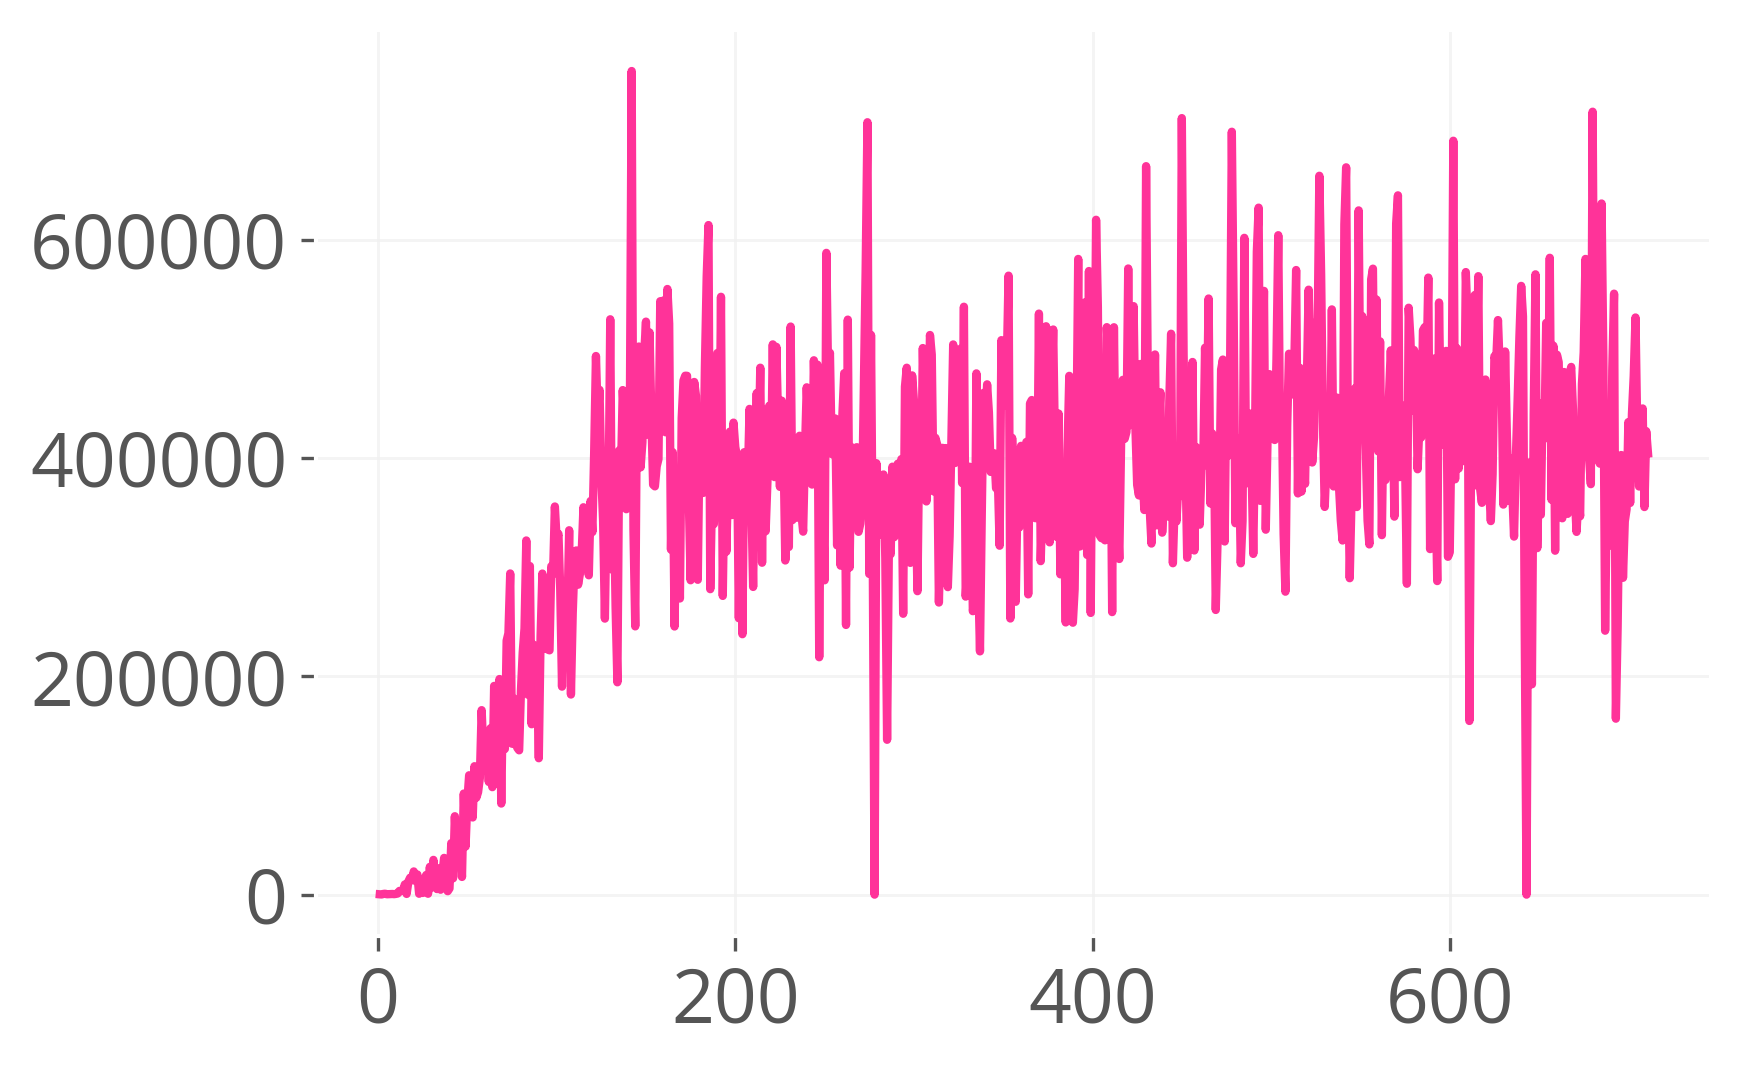

In [120]:
## This doesnt look great!
plt.plot(transactions.groupby('day')['quantity'].sum())

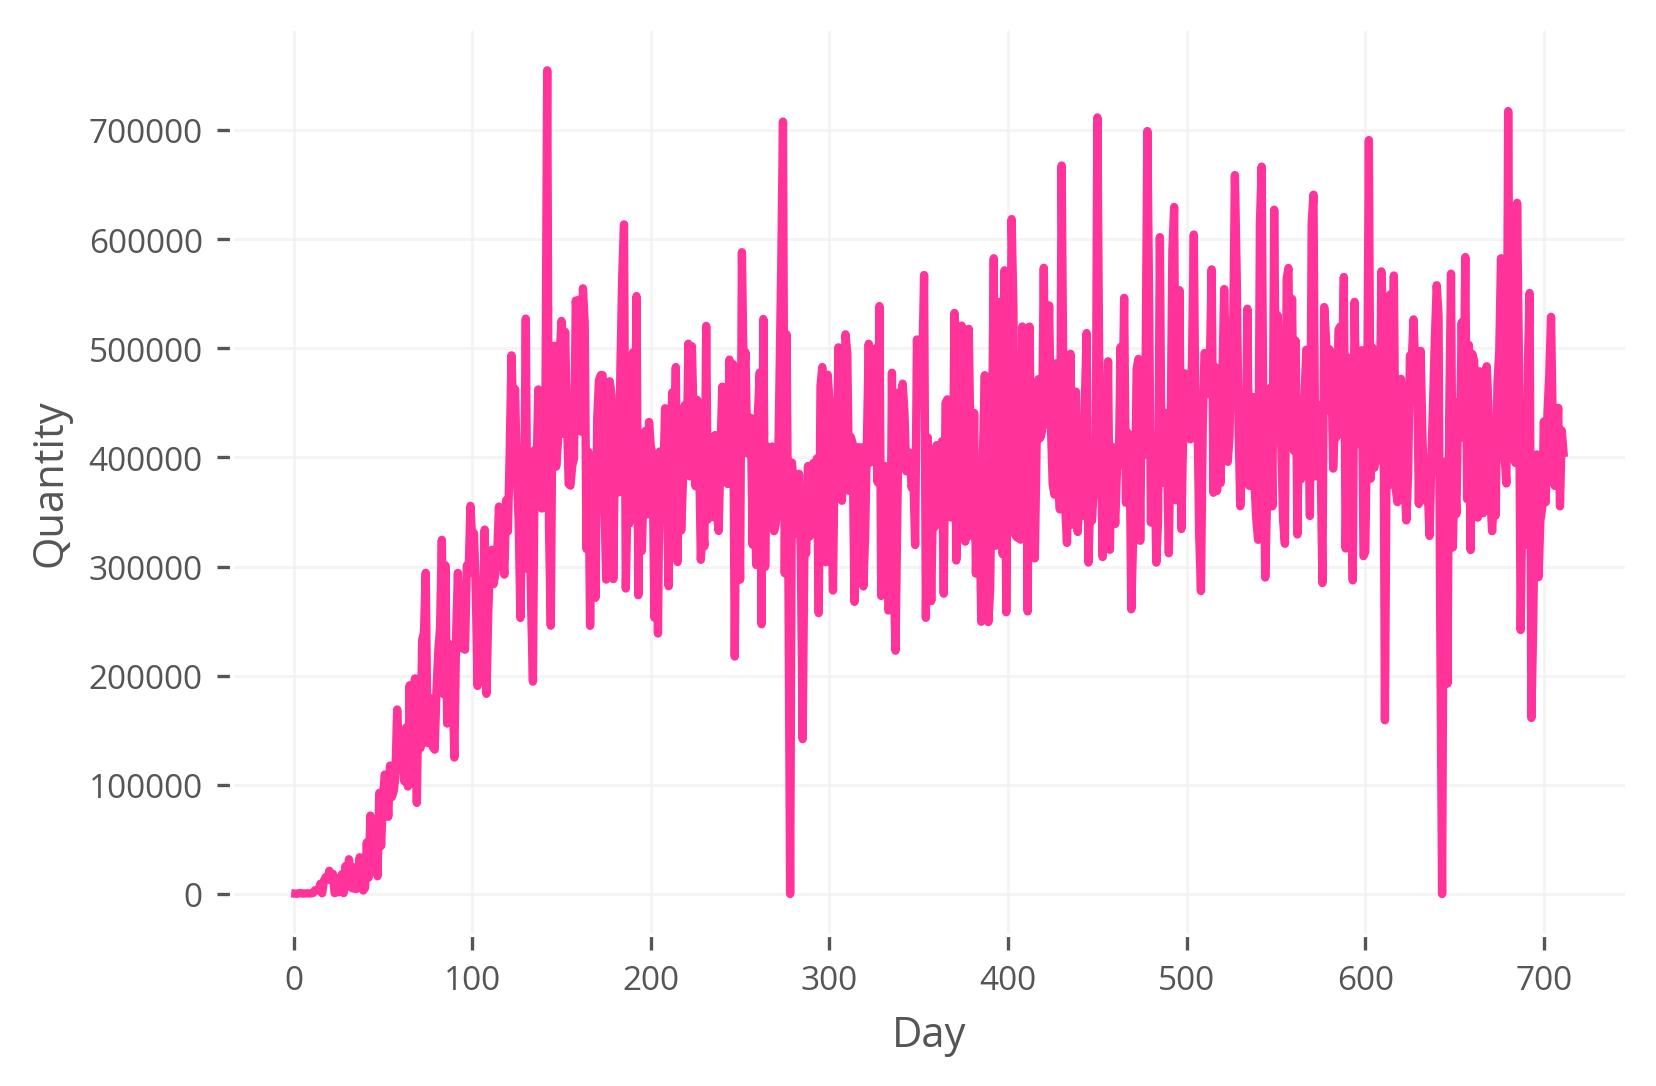

In [132]:
fig, ax = plt.subplots()

plt.plot(
    transactions.groupby('day')['quantity'].sum(), 
    #color = PEAK_COLORS_1[3]
)

plt.xlabel('Day', size=10)
plt.ylabel('Quantity', size=10)
#plt.title('Quantity over time', size=10)
ax.tick_params(axis='both', which='major', labelsize=8)

`seaborn` is very similar! The most common chars are:
* `sns.lineplot()`
* `sns.barplot()`
* `sns.distplot()`

So if we wanted to create the same plot as above we use:

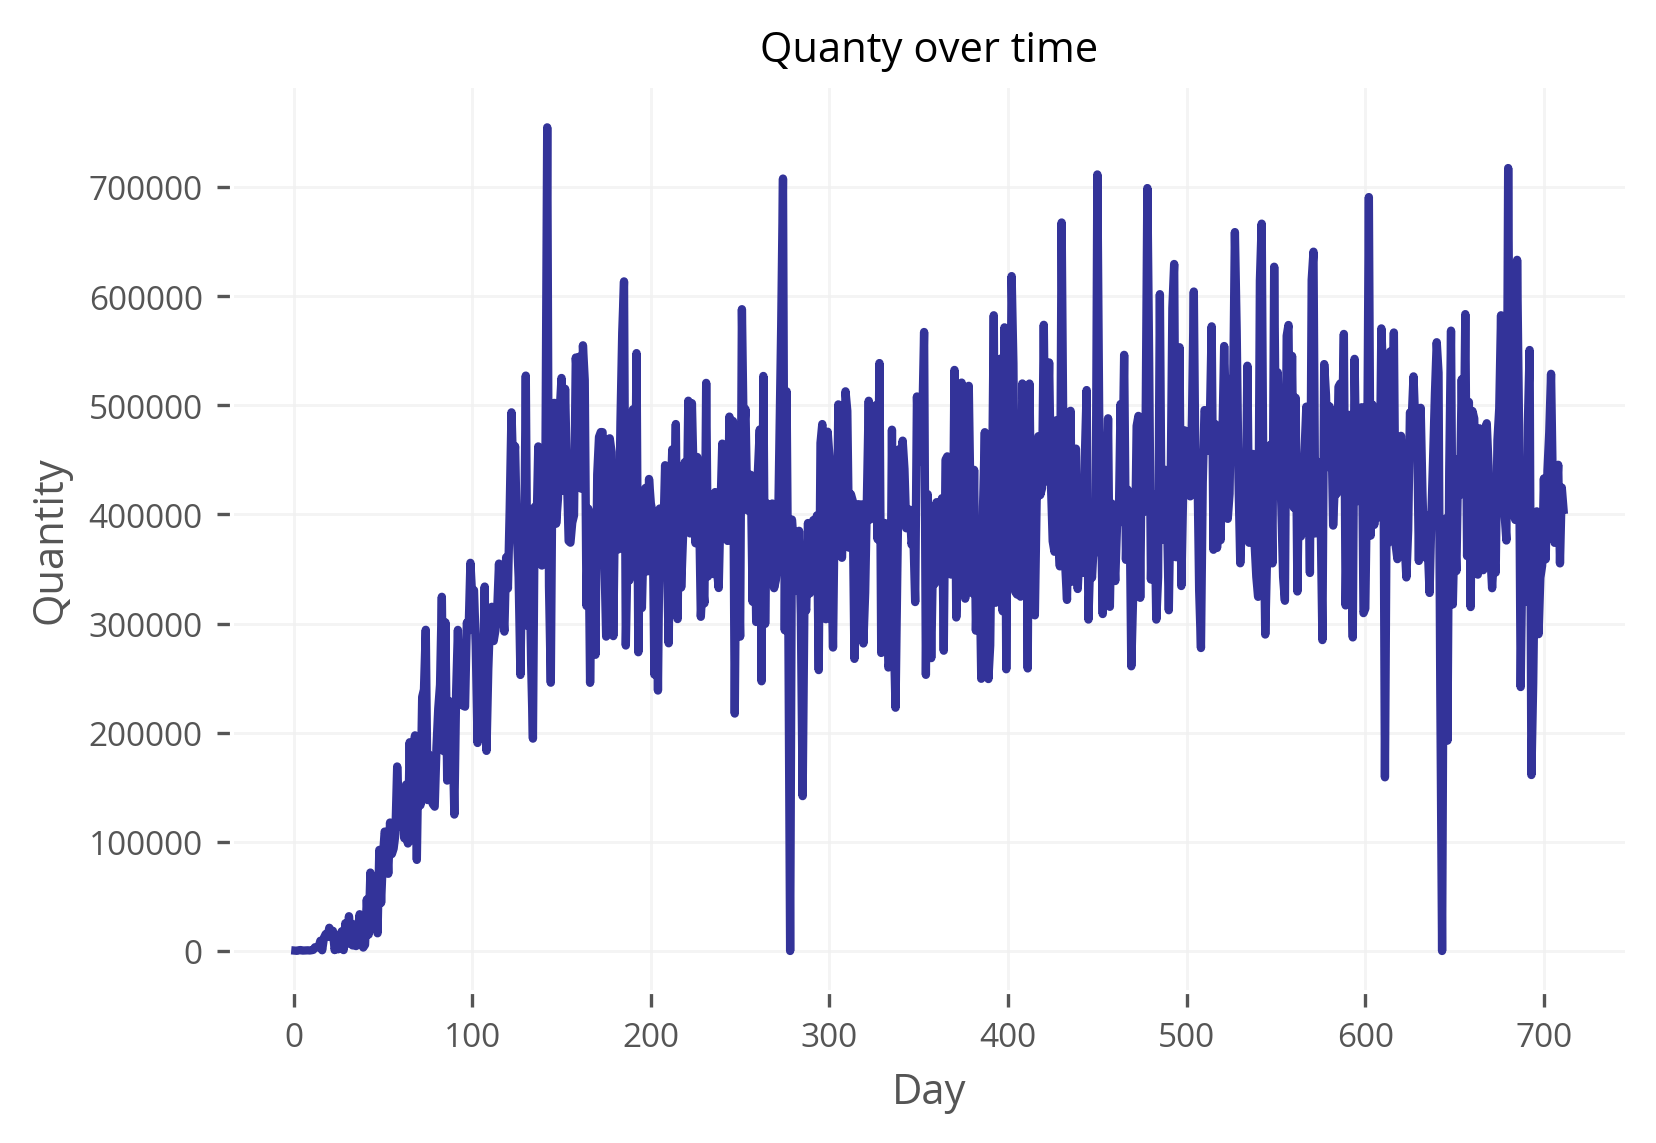

In [142]:
fig, ax = plt.subplots()

# Replaces this with seaborn
sns.lineplot( data = transactions.groupby('day')['quantity'].sum(), 
            color = PEAK_COLORS_1[3])


plt.xlabel('Day', size=10)
plt.ylabel('Quantity', size=10)
plt.title('Quantity over time', size=10)
ax.tick_params(axis='both', which='major', labelsize=8)

You may also wish to show data within two groups, eg department and quantity over time. 

In [148]:
data_to_plot = pd.DataFrame(df.groupby(['day', 'department'])['quantity'].sum()).reset_index()

In [149]:
data_to_plot.head()

,day,department,quantity
0,1,,0
1,1,DELI,5
2,1,DRUG GM,45
3,1,GROCERY,217
4,1,MEAT,2


Sometimes plotting all of the data can look unreadable! 

<AxesSubplot:xlabel='day', ylabel='quantity'>

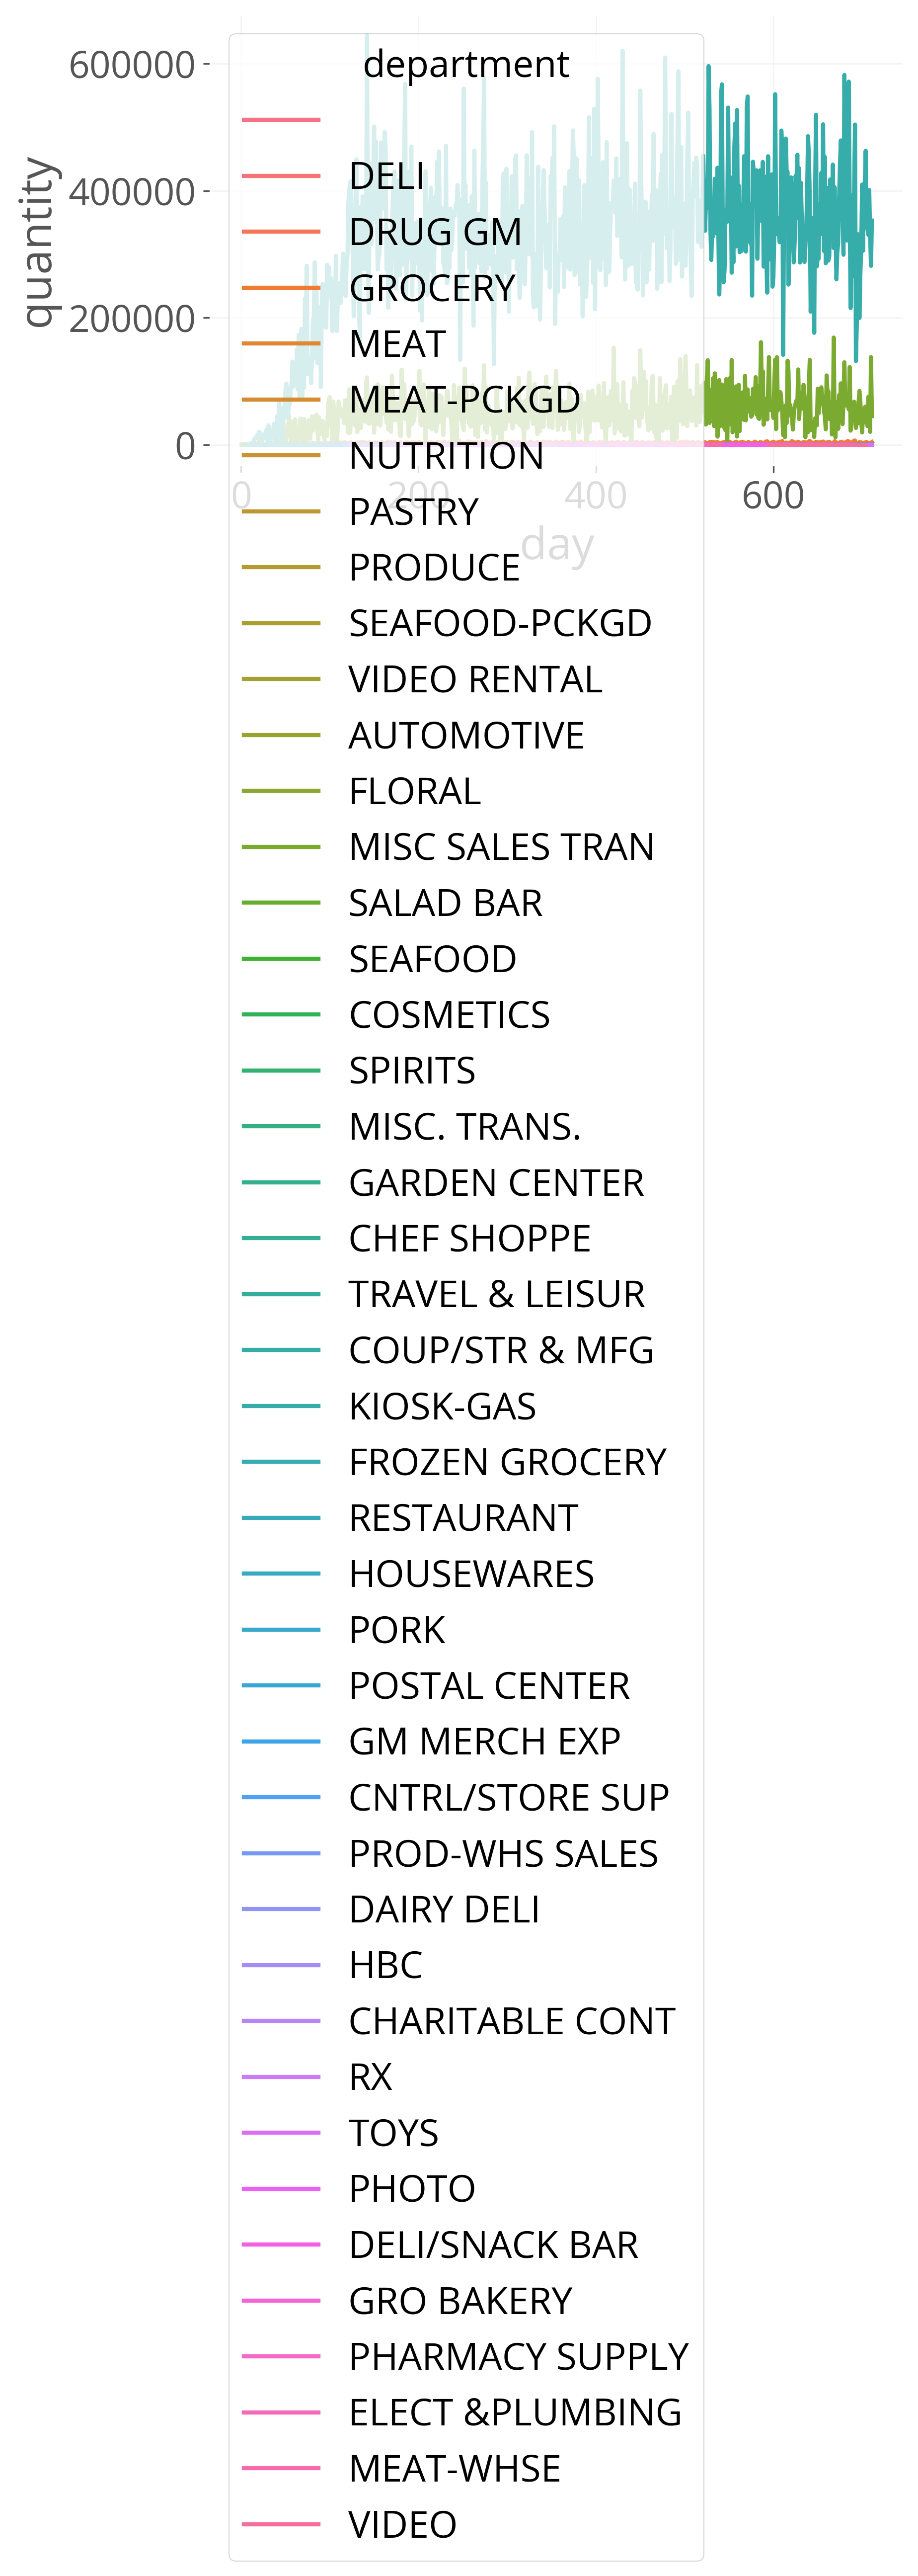

In [155]:
sns.lineplot(data = data_to_plot,
             x = 'day', 
             y = 'quantity', 
            hue = 'department')

Lets filter some out! Some functions I am using here:
* `unique()` - Get the distinct values in that list
* `isin()` - Only select the data I want

In [157]:
data_to_plot = data_to_plot[data_to_plot['day'] <= 30]

In [233]:
departments = data_to_plot.sort_values('quantity', ascending=False)['department'].unique()[0:9]
data_to_plot = data_to_plot[data_to_plot['department'].isin(departments)]

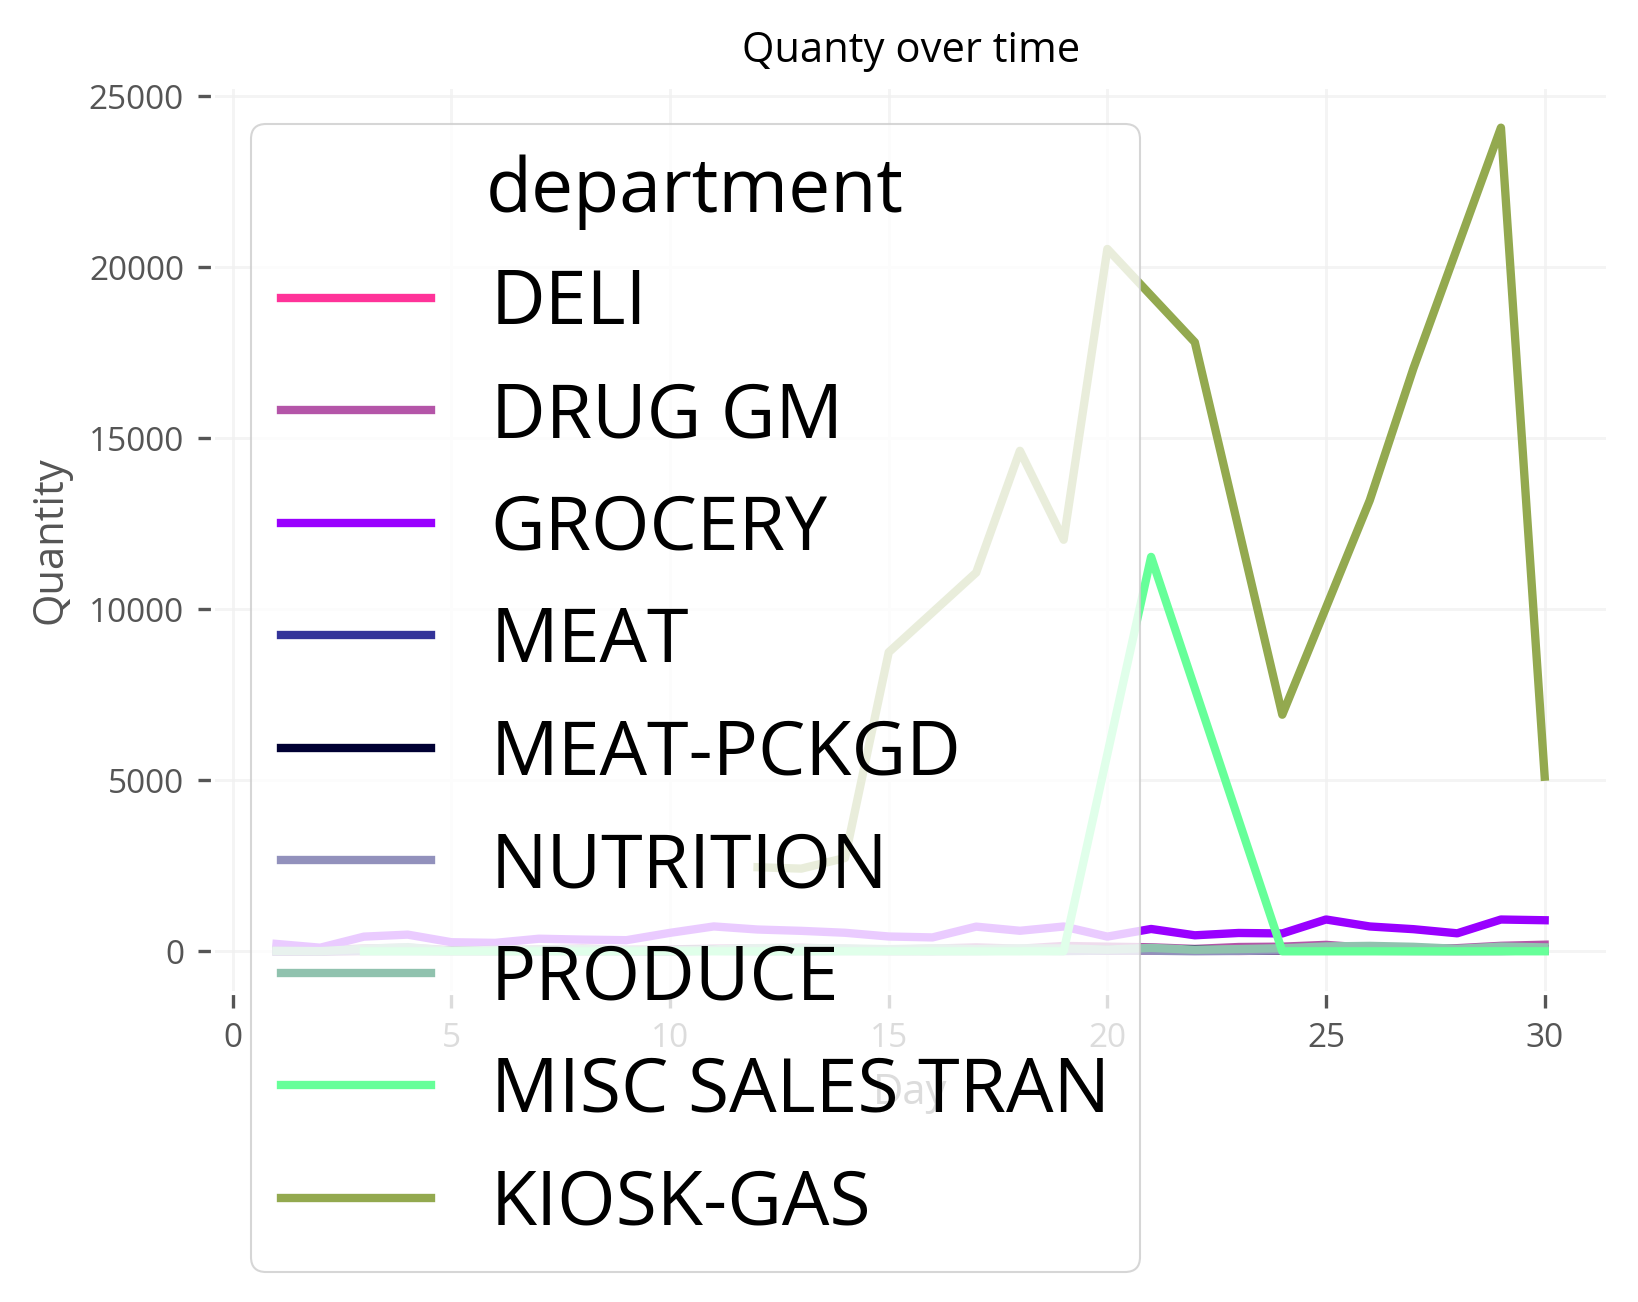

In [235]:
fig, ax = plt.subplots()

sns.lineplot(data = data_to_plot,
             x = 'day', 
             y = 'quantity', 
            hue = 'department')

plt.xlabel('Day', size=10)
plt.ylabel('Quantity', size=10)
plt.title('Quanty over time', size=10)
ax.tick_params(axis='both', which='major', labelsize=8)

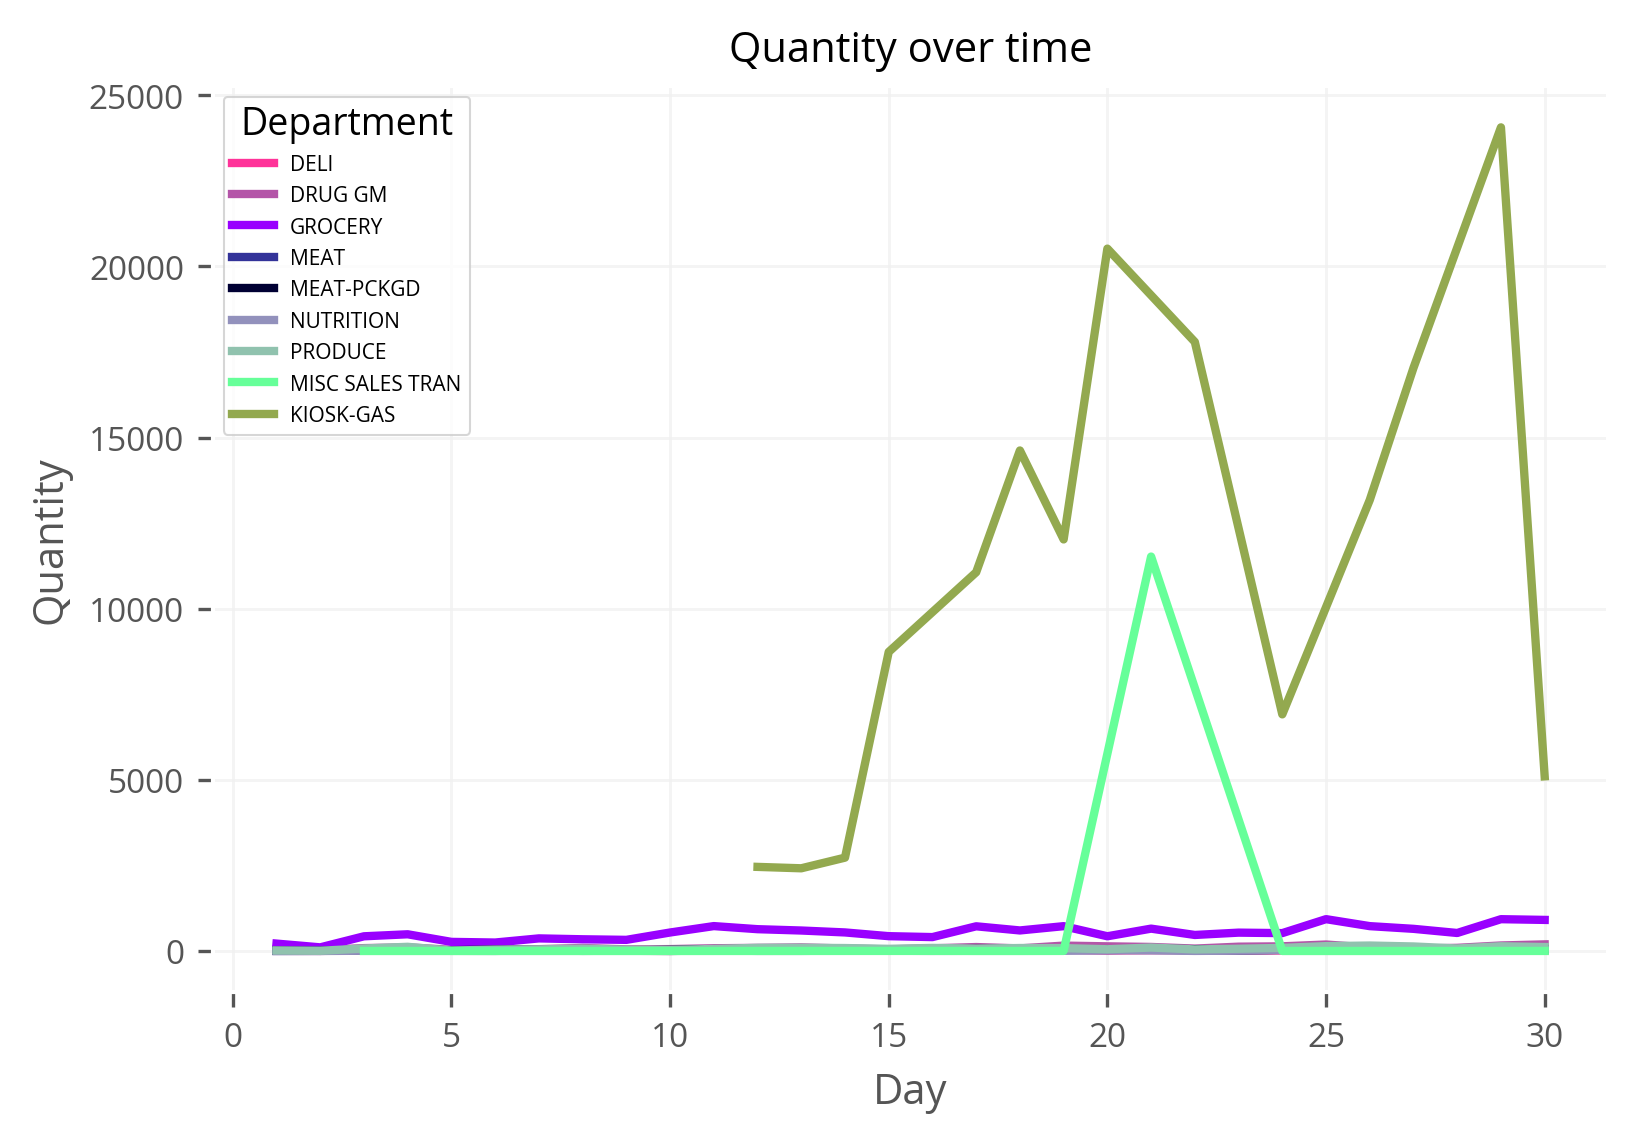

In [251]:
fig, ax = plt.subplots()

sns.lineplot(data = data_to_plot,
             x = 'day', 
             y = 'quantity', 
            hue = 'department')

plt.xlabel('Day', size=10)
plt.ylabel('Quantity', size=10)
plt.title('Quantity over time', size=10)

ax.legend(loc = 'best',
          fontsize = 5, 
          title = 'Department', 
          title_fontsize =9 )


ax.tick_params(axis='both', which='major', labelsize=8)
